# CAP 6618 - Machine Learning for Computer Vision

## Project 5: Supervised Image Classification using TensorFlow
Design and implement a complete solution to the problem of image classification using TensorFlow.

### Educational Objectives
* Learn how to implement different image classification solutions in TensorFlow
* Learn how to implement transfer learning in TensorFlow
* Learn how to evaluate and fine-tune the performance of different classifiers

### Datasets and Sources
1. Flower dataset: http://download.tensorflow.org/example_images/flower_photos.tgz
2. Models: 
    * Inception V3 Classification: https://tfhub.dev/google/imagenet/inception_v3/classification/4
    * Inception V3 Feature Vector: https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4
3. Code adapted: 
    * https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub
    * https://www.tensorflow.org/tutorials/load_data/images

## Step 1: Setup

In [1]:
# Common imports
import numpy as np
import os

# Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Step 2: Classify an Image using a Pretrained Inception V3 (Imagenet)

#### Download the Pretrained Inception V3 Classifier

In [2]:
# Documentation: https://tfhub.dev/google/imagenet/inception_v3/classification/4

# Link to Inception V3 classifier (Note: "classification" in the link)
inceptionV3_url ="https://tfhub.dev/google/imagenet/inception_v3/classification/4" 

# Input shape for Inception V3 (expected size 299x299)
IMAGE_SHAPE = (299, 299)

# Create a new sequential model from the downloaded model
inceptionV3_model = tf.keras.Sequential([hub.KerasLayer(inceptionV3_url, input_shape=IMAGE_SHAPE+(3,))])

#### Show the Sample Image and Make Prediction

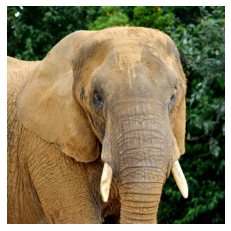

In [3]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

# Load, preprocess, and normalize the input
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=IMAGE_SHAPE)
x = image.img_to_array(img)
x = np.array([x]) / 255.0

# Plot the image
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# https://tfhub.dev/google/imagenet/inception_v3/classification/4
# The mapping from indices to class labels: download.tensorflow.org/data/ImageNetLabels.txt 
# (with class 0 for "background", followed by 1000 actual ImageNet classes)

# Make prediction and print result
inceptionV3_preds = inceptionV3_model.predict(x)
print("Prediction shape: ", inceptionV3_preds.shape)

Prediction shape:  (1, 1001)


In [5]:
# Shift the label by one since the first element is "background"
predicted_class = np.argmax(inceptionV3_preds[0], axis=-1)
print("Prediction class index: ", predicted_class) 

Prediction class index:  387


#### Decode the Prediction

In [6]:
# Load the ImageNet labels
imageNetLabels_path = tf.keras.utils.get_file(
                'ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

imagenet_labels = np.array(open(imageNetLabels_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

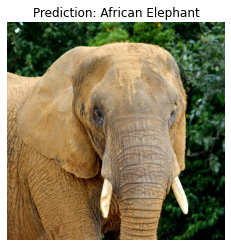

In [7]:
# Plot the image with its prediction
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

## Step 3: Load the dataset

In [8]:
# Load Data File
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)

In [9]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

# Data Augmentation using ImageDataGenerator
image_generator = image.ImageDataGenerator(rescale=1/255, rotation_range=30, horizontal_flip=True)

# Input shape for Inception V3
IMAGE_SHAPE = (299, 299)

# Generate batches of augmented data
image_data = image_generator.flow_from_directory(str(data_root), shuffle=True, target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


## Step 4: Visualize a sample of the dataset

In [10]:
# Display Class label
print("Flower dataset class labels:", image_data.class_indices)

Flower dataset class labels: {'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [11]:
# Convert class label dictionary into array
class_labels = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_labels = np.array([key.title() for key, value in class_labels])
class_labels

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [12]:
def plot_samples(images, labels):
    """ Method use to plot samples """
    
    plt.figure(figsize=(10, 10))
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(class_labels[labels[i].argmax()])
        plt.axis('off')

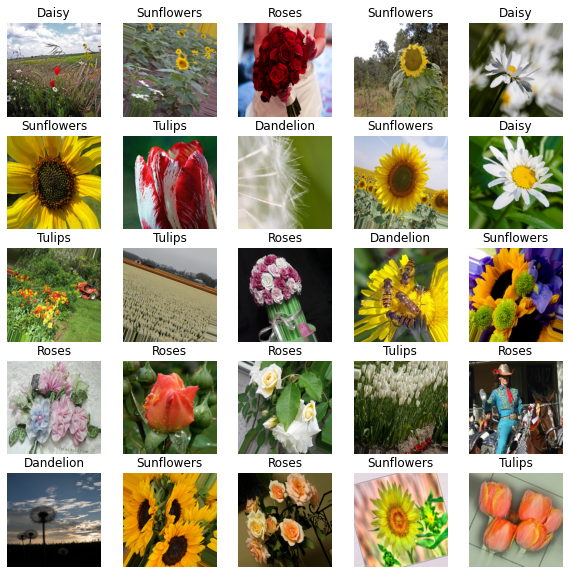

In [13]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/DirectoryIterator?hl=ko#next

# next() return the next batch of samples
images, labels = next(image_data)

# Plot the samples
plot_samples(images, labels)

## Step 5: Prepare the data

In [14]:
# Split the images and labels of this single batch (size 32 by default)
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 299, 299, 3)
Label batch shape:  (32, 5)


## Step 6: Run the Classifier (use the classifier as it is) on a Batch of Images

In [15]:
# Predict on the first batch of flower dataset
result_batch = inceptionV3_model.predict(image_batch)
result_batch.shape

(32, 1001)

In [16]:
# Show the predicted labels of the sample batch
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['daisy', 'picket fence', 'greenhouse', 'pinwheel', 'pot',
       'spider web', 'ladybug', 'cardoon', 'cardoon', 'picket fence',
       'greenhouse', 'jellyfish', 'artichoke', 'rapeseed', 'picket fence',
       'bee', 'spider web', 'vase', 'picket fence', 'daisy',
       'picket fence', 'bee', 'notebook', 'daisy', 'barn spider',
       'picket fence', 'daisy', 'cardoon', 'notebook', 'rapeseed', 'vase',
       'ashcan'], dtype='<U30')

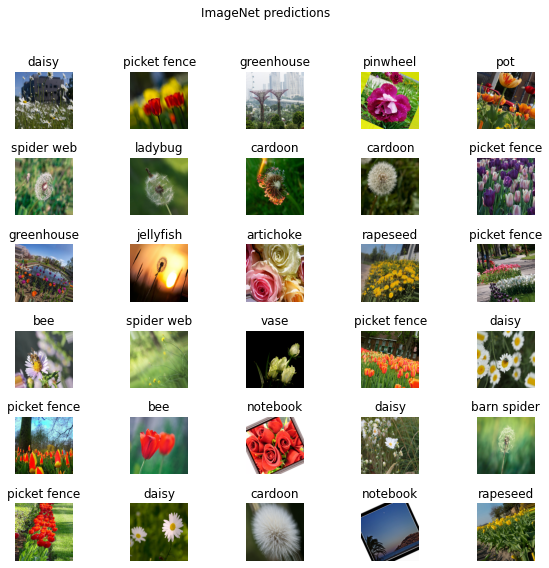

In [17]:
# Plot the batch of images along with the predicted label
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

## Step 7: Pretrained Inception V3 Model as the Base Model with Additional Layers

In this step we will use a pre-trained Inception v3 model, freeze all layers up to the bottleneck layer (i.e., the last layer before the output layer), and replace the output layer with the appropriate number of outputs for a new classification task: the 5-class flowers dataset

In [18]:
# https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4

# URL to the headless Inception V3 (Note: "feature_vector" in the link)
feature_extractor_url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4"

# Input shape for Inception V3
IMAGE_SHAPE = (299, 299)

# Download the headless Inception V3 as the base model
base_model = hub.KerasLayer(feature_extractor_url, input_shape=IMAGE_SHAPE+(3,))

# Check for what is the resulting vector when feed the image batch into the base model
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 2048)


In [19]:
# Freeze the base model
base_model.trainable = False

# Add the last output layer (5 classes)
TL_model = tf.keras.Sequential([base_model,
                                layers.Dense(image_data.num_classes)])
TL_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [20]:
# Source: https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

class CollectBatchStats(tf.keras.callbacks.Callback):
    """ A custom callback to log the loss and accuracy of each batch individually """
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        self.model.reset_metrics()

In [21]:
# Training Configuration

# Calculate for steps_per_epoch
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

epochs = 10

In [22]:
# Compile the model
TL_model.compile(optimizer=tf.keras.optimizers.Adam(), metrics=['acc'], 
                 loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True))

# Intialized custom callback function
batch_stats_callback = CollectBatchStats()

# Train the model
TL_history = TL_model.fit(image_data, epochs=epochs,
                            steps_per_epoch=steps_per_epoch,
                            callbacks=[batch_stats_callback])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 115.0 steps
Epoch 1/10
115/115 [==============================] - 69s 603ms/step - loss: 0.6735 - acc: 0.8125
Epoch 2/10
115/115 [==============================] - 64s 559ms/step - loss: 0.3859 - acc: 0.8438
Epoch 3/10
115/115 [==============================] - 67s 579ms/step - loss: 0.3191 - acc: 0.9062
Epoch 4/10
115/115 [==============================] - 67s 581ms/step - loss: 0.2943 - acc: 0.9688
Epoch 5/10
115/115 [==============================] - 67s 582ms/step - loss: 0.2636 - acc: 0.9688
Epoch 6/10
115/115 [==============================] - 66s 578ms/step - loss: 0.2395 - acc: 0.9375
Epoch 7/10
115/115 [==============================] - 66s 573ms/step - loss: 0.2141 - acc: 0.9062
Epoch 8/10
115/115 [==============================] - 67s 582ms/step - loss: 0.2200 - acc: 0.9688
Epoch 9/10
115/115 [==============================] - 66s 573ms/step - loss: 0.2082 - acc: 0.9062
Epoch 10/10
115/115 [==============================] - 66s 570ms/step - loss: 0.2012 - acc: 0.90

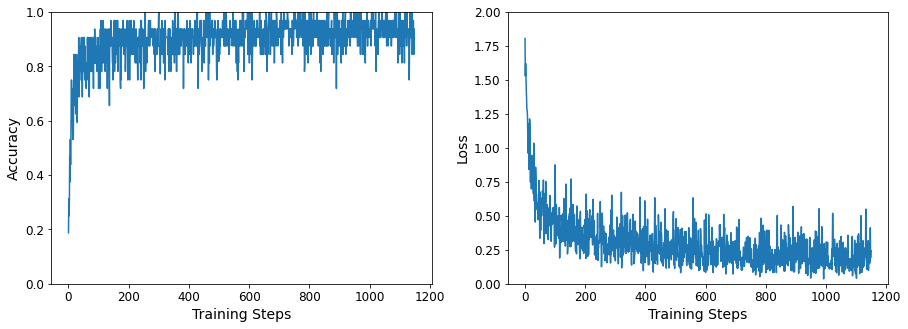

In [23]:
# Plot Model Accuracy and Loss by Training Steps
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(batch_stats_callback.batch_acc)
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Training Steps")
axs[0].set_ylim([0,1])

axs[1].plot(batch_stats_callback.batch_losses)
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Training Steps")
axs[1].set_ylim([0,2])

plt.show()

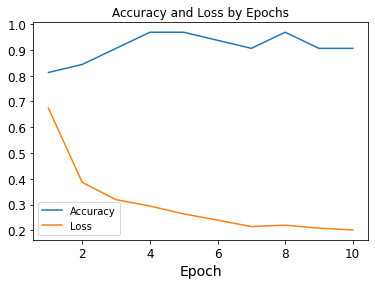

In [24]:
# Plot Model Accuracy and Loss by Epochs
x_axis = np.arange(1, epochs + 1, 1)
plt.plot(x_axis, TL_history.history['acc'])
plt.plot(x_axis, TL_history.history['loss'])
plt.title("Accuracy and Loss by Epochs")
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='best')
plt.show()

In [25]:
# Predict the image batch with the Transfer Learning Model
predicted_batch = TL_model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_labels[predicted_id]
predicted_label_batch

array(['Daisy', 'Tulips', 'Tulips', 'Tulips', 'Tulips', 'Dandelion',
       'Dandelion', 'Dandelion', 'Dandelion', 'Tulips', 'Tulips',
       'Dandelion', 'Roses', 'Dandelion', 'Tulips', 'Daisy', 'Dandelion',
       'Tulips', 'Tulips', 'Daisy', 'Tulips', 'Tulips', 'Roses', 'Daisy',
       'Dandelion', 'Tulips', 'Daisy', 'Dandelion', 'Sunflowers',
       'Tulips', 'Sunflowers', 'Roses'], dtype='<U10')

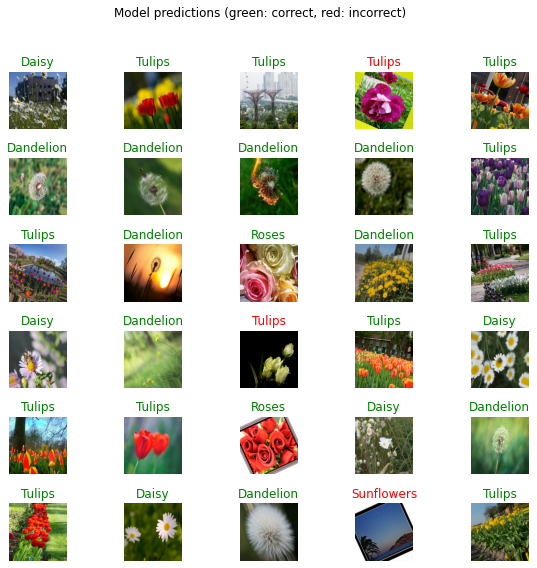

In [26]:
# Shift the label by one since the first element is "background"
label_id = np.argmax(label_batch, axis=-1)

# Plot Model Prediction
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    color = "green" if predicted_id[n] == label_id[n] else "red"
    plt.title(predicted_label_batch[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")